In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.corpus import stopwords
import pandas as pd
import re
import pickle
import numpy as np

In [15]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [29]:
df = pd.read_csv('data.csv')
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [30]:
df['text'] = df['TITLE'] + " " + df['ABSTRACT']
df['clean_text'] = df['text'].apply(clean_text)

In [31]:
y = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]
y = y.to_numpy()

In [19]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=300)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=300),
    LSTM(64),
    Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=5)


/home/jana/.pyenv/versions/3.10.6/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 96s 219ms/step - accuracy: 0.4195 - loss: 1.9471 - val_accuracy: 0.6216 - val_loss: 1.6445
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 127s 303ms/step - accuracy: 0.6006 - loss: 1.6430 - val_accuracy: 0.5563 - val_loss: 1.5452
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 117s 279ms/step - accuracy: 0.6201 - loss: 1.5653 - val_accuracy: 0.6466 - val_loss: 1.5489
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 126s 299ms/step - accuracy: 0.6959 - loss: 1.4919 - val_accuracy: 0.7530 - val_loss: 1.4551
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 128s 305ms/step - accuracy: 0.7806 - loss: 1.4066 - val_accuracy: 0.7563 - val_loss: 1.5186


In [45]:
model.save('model.h5')

In [46]:
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [38]:
y_test  # ground truth labels (as integers)
y_pred_probs = model.predict(X_test)  # predicted probabilities
y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)  # predicted class indices


132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step


In [41]:
labels = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance'
]

In [42]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred, target_names=labels))


Accuracy: 0.7370679380214541

Classification Report:

                      precision    recall  f1-score   support

    Computer Science       0.72      0.89      0.80      1722
             Physics       0.91      0.80      0.85      1086
         Mathematics       0.61      0.78      0.69       874
          Statistics       0.00      0.00      0.00       388
Quantitative Biology       0.00      0.00      0.00        87
Quantitative Finance       0.00      0.00      0.00        38

            accuracy                           0.74      4195
           macro avg       0.37      0.41      0.39      4195
        weighted avg       0.66      0.74      0.69      4195



/home/jana/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jana/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jana/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

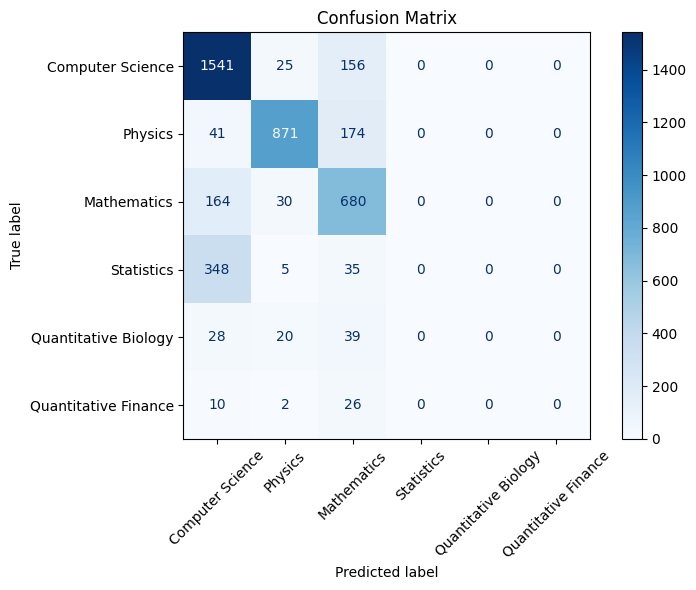

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert one-hot y_test to class indices
y_test_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Class label names
labels = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
